### EDA

In [195]:
# ==========================================
# 1️⃣ Importación de librerías y carga del CSV
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Cargar el archivo CSV (ajusta el path si es necesario)
df = pd.read_csv("../data/bbva_data.csv")

# Mostrar las primeras filas
df.head()

,Price,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,Ticker,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,4.04003381729126,13.6233491897583,0.0,13.757854461669922,13.594527244567871,13.69060230255127,0.0,8244257
3,2000-01-04,3.9346189498901367,13.267873764038086,0.0,13.536882400512695,13.219837188720703,13.45041561126709,0.0,8522096
4,2000-01-05,3.8462960720062256,12.970044136047363,0.0,13.210229873657227,12.912399291992188,13.142976760864258,0.0,12159826


In [196]:
# ==========================================
# 2️⃣ Información básica del dataset
# ==========================================
df.info()

# Verificar columnas y tipos de datos
print("\nColumnas del dataset:")
print(df.columns.tolist())

# Descripción estadística general
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         6637 non-null   object
 1   Adj Close     6636 non-null   object
 2   Close         6636 non-null   object
 3   Dividends     6636 non-null   object
 4   High          6636 non-null   object
 5   Low           6636 non-null   object
 6   Open          6636 non-null   object
 7   Stock Splits  6636 non-null   object
 8   Volume        6636 non-null   object
dtypes: object(9)
memory usage: 466.8+ KB

Columnas del dataset:
['Price', 'Adj Close', 'Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume']


,count,unique,top,freq
Price,6637,6637,Ticker,1
Adj Close,6636,5916,4.894564151763916,5
Close,6636,4055,15.035642623901367,12
Dividends,6636,41,0.0,6552
High,6636,3994,12.48967170715332,10
Low,6636,4021,14.411160469055176,11
Open,6636,3834,14.372730255126953,12
Stock Splits,6636,2,0.0,6635
Volume,6636,6559,0,78


In [197]:
# ==========================================
# Leer CSV con MultiIndex de columnas
# ==========================================
import pandas as pd

# Ajusta la ruta si hace falta
path = "../data/bbva_data.csv"

# Lee usando dos filas de cabecera (header=[0,1]),
# usa la primera columna como índice (Date) y parsea fechas
df = pd.read_csv(path, header=[0,1], index_col=0, parse_dates=[0])

# Aplanar columnas: nos quedamos solo con el nivel superior ('Open','High',...)
df.columns = df.columns.get_level_values(0)

# Si existe Stock Splits y está vacío, la quitamos
if 'Stock Splits' in df.columns:
    if df['Stock Splits'].isna().all() or (df['Stock Splits'] == 0).all():
        df = df.drop(columns=['Stock Splits'])

# Convertir a columna Date (en lugar de índice) si la quieres así
df = df.reset_index().rename(columns={'index': 'Date'})

# Asegurar tipos numéricos
num_cols = [c for c in df.columns if c not in ['Date']]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


df.columns.name = None

df.head()

,Date,Adj Close,Close,Dividends,High,Low,Open,Volume
0,2000-01-03,4.04,13.62,0.00,13.76,13.59,13.69,8244257
1,2000-01-04,3.93,13.27,0.00,13.54,13.22,13.45,8522096
2,2000-01-05,3.85,12.97,0.00,13.21,12.91,13.14,12159826
3,2000-01-06,3.85,12.97,0.00,12.97,12.97,12.97,0
4,2000-01-07,3.89,13.13,0.00,13.25,13.00,13.25,62261944


In [198]:
# Convertir la columna Date a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordenar por fecha (por si no lo está)
df.sort_values('Date', inplace=True)

# Resetear índice
df.reset_index(drop=True, inplace=True)

In [199]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
Dividends    0
High         0
Low          0
Open         0
Volume       0
dtype: int64

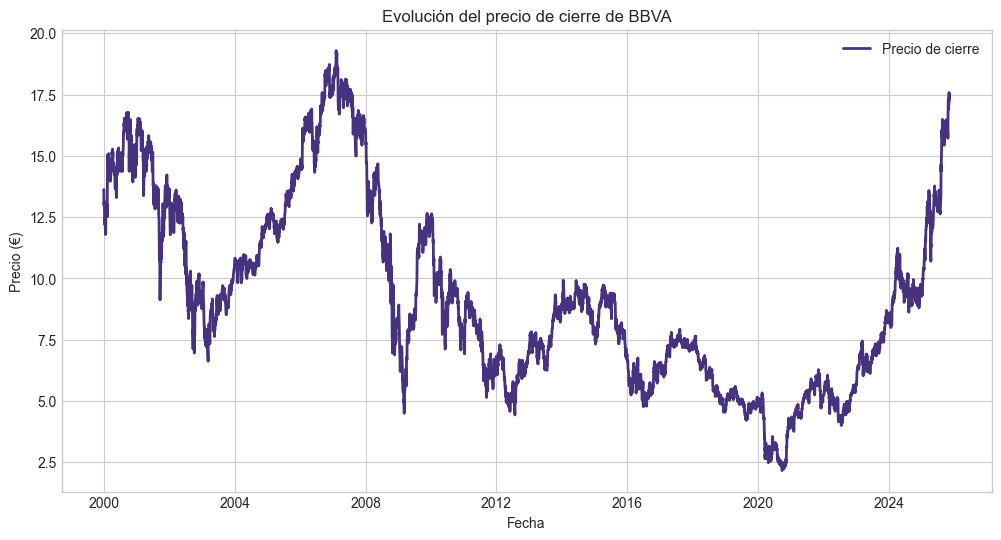

In [200]:
# ==========================================
# 4️⃣ Evolución temporal del precio de cierre
# ==========================================
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', linewidth=2)
plt.title("Evolución del precio de cierre de BBVA")
plt.xlabel("Fecha")
plt.ylabel("Precio (€)")
plt.legend()
plt.show()

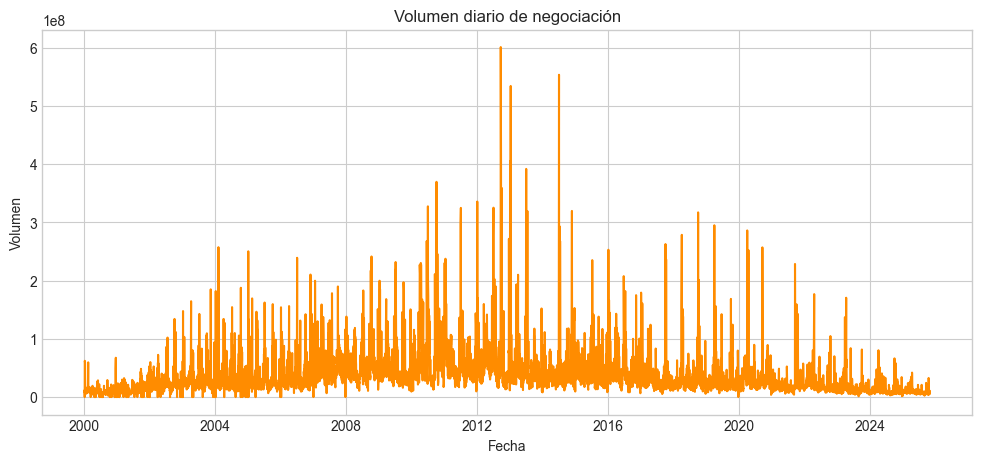

In [201]:
# ==========================================
# 5️⃣ Volumen de negociación
# ==========================================
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'], color='darkorange')
plt.title("Volumen diario de negociación")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.show()

In [202]:
# ==========================================
# 7️⃣ Variables derivadas: retornos, medias móviles, volatilidad
# ==========================================

# Retorno diario
df['Return'] = df['Close'].pct_change()

# Medias móviles
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Volatilidad (desviación estándar móvil)
df['Volatility_30'] = df['Return'].rolling(window=30).std()

# Rango diario: diferencia entre el máximo y el mínimo del día
df['Range'] = df['High'] - df['Low']

# Cuerpo de la vela: diferencia entre el precio de apertura y cierre (en valor absoluto)
df['Body'] = abs(df['Close'] - df['Open'])


# Lista de eventos históricos importantes

eventos_historicos = [
    {'fecha': '2001-09-11', 'evento': 'Atentados 11S', 'impacto': 1},
    {'fecha': '2008-09-15', 'evento': 'Crisis financiera global', 'impacto': 1},
    {'fecha': '2010-05-01', 'evento': 'Crisis de deuda en la Eurozona', 'impacto': 1},
    {'fecha': '2012-07-26', 'evento': 'Draghi: "Whatever it takes"', 'impacto': 0},
    {'fecha': '2016-06-23', 'evento': 'Brexit', 'impacto': 1},
    {'fecha': '2020-03-01', 'evento': 'Inicio pandemia COVID-19', 'impacto': 1},
    {'fecha': '2022-02-24', 'evento': 'Guerra en Ucrania', 'impacto': 1},
    {'fecha': '2022-07-01', 'evento': 'Subida de tipos BCE', 'impacto': 0}
]

# Convertimos la lista a DataFrame
df_eventos = pd.DataFrame(eventos_historicos)

# Convertimos las fechas a formato datetime
df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha'])

# Creamos una nueva columna con valor 0 (por defecto = sin evento negativo)
df['evento_negativo'] = 0

# Recorremos la lista de eventos
for evento in eventos_historicos:
    fecha_evento = pd.Timestamp(evento['fecha'])
    impacto = evento['impacto']

    # Creamos una ventana de ±15 días alrededor del evento
    mask = (df['Date'] >= fecha_evento - pd.Timedelta(days=15)) & \
           (df['Date'] <= fecha_evento + pd.Timedelta(days=15))

    # Marcamos con el valor del impacto (1 o 0)
    df.loc[mask, 'evento_negativo'] = impacto


# Mostrar últimas filas con nuevas variables
df.tail(10)

,Date,Adj Close,Close,Dividends,High,Low,Open,Volume,Return,MA_7,MA_30,Volatility_30,Range,Body,evento_negativo
6625,2025-10-20,16.98,17.30,0.00,17.32,16.79,16.87,10945260,0.04,16.16,16.21,0.02,0.53,0.42,0
6626,2025-10-21,16.75,17.07,0.00,17.30,17.00,17.27,7222921,-0.01,16.34,16.25,0.02,0.30,0.20,0
6627,2025-10-22,16.69,17.00,0.00,17.18,16.85,16.90,7052132,-0.00,16.50,16.28,0.02,0.33,0.10,0
6628,2025-10-23,16.65,16.96,0.00,17.17,16.90,17.00,4720528,-0.00,16.64,16.30,0.02,0.27,0.04,0
6629,2025-10-24,16.59,16.90,0.00,17.10,16.74,17.01,6644829,-0.00,16.80,16.32,0.02,0.36,0.11,0
6630,2025-10-27,16.89,17.20,0.00,17.24,17.00,17.05,6597073,0.02,17.01,16.35,0.02,0.23,0.15,0
6631,2025-10-28,16.88,17.19,0.00,17.22,17.04,17.07,5314738,-0.00,17.09,16.39,0.02,0.17,0.12,0
6632,2025-10-29,17.26,17.58,0.00,17.58,17.06,17.21,10750147,0.02,17.13,16.44,0.02,0.53,0.37,0
6633,2025-10-30,16.96,17.28,0.00,17.41,17.05,17.39,10839276,-0.02,17.16,16.47,0.02,0.36,0.11,0
6634,2025-10-31,17.12,17.43,0.00,17.70,17.25,17.35,9588805,0.01,17.22,16.51,0.02,0.45,0.08,0


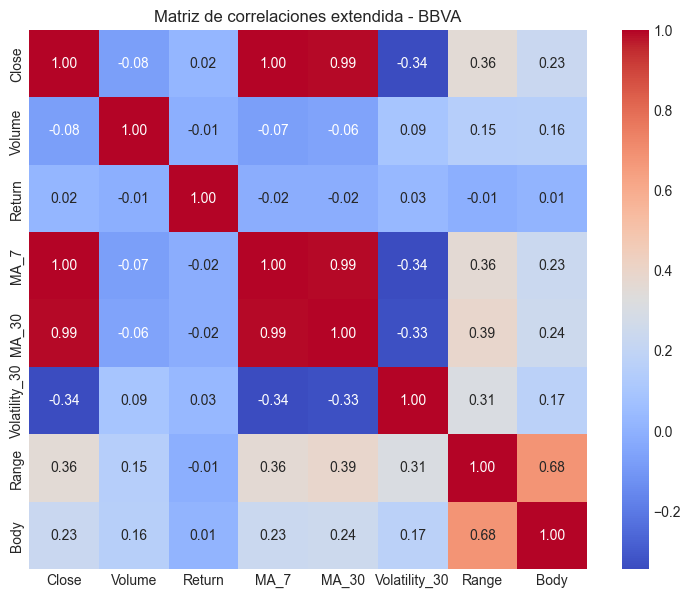


📊 Correlaciones con el precio de cierre (close):
Close            1.00
MA_7             1.00
MA_30            0.99
Range            0.36
Body             0.23
Return           0.02
Volume          -0.08
Volatility_30   -0.34
Name: Close, dtype: float64


In [203]:
cols_corr = [
    'Close', 'Volume', 'Return', 'MA_7', 'MA_30',
    'Volatility_30', 'Range', 'Body'
]

# Calculamos la matriz de correlación
corr = df[cols_corr].corr()

# Y la visualizamos con un mapa de calor
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones extendida - BBVA")
plt.show()

print("\n📊 Correlaciones con el precio de cierre (close):")
print(corr["Close"].sort_values(ascending=False))

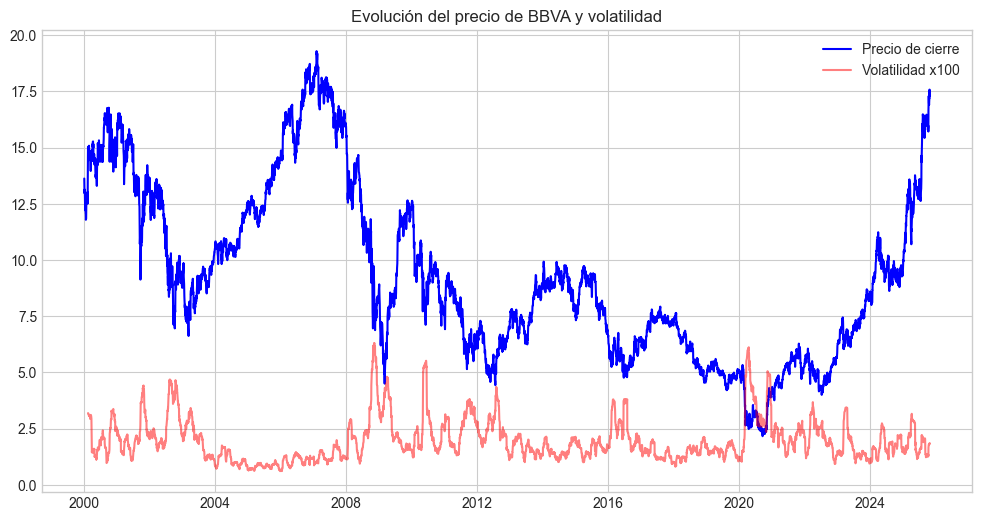

In [204]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', color='blue')
plt.plot(df['Date'], df['Volatility_30']*100, label='Volatilidad x100', color='red', alpha=0.5)
plt.legend()
plt.title('Evolución del precio de BBVA y volatilidad')
plt.show()

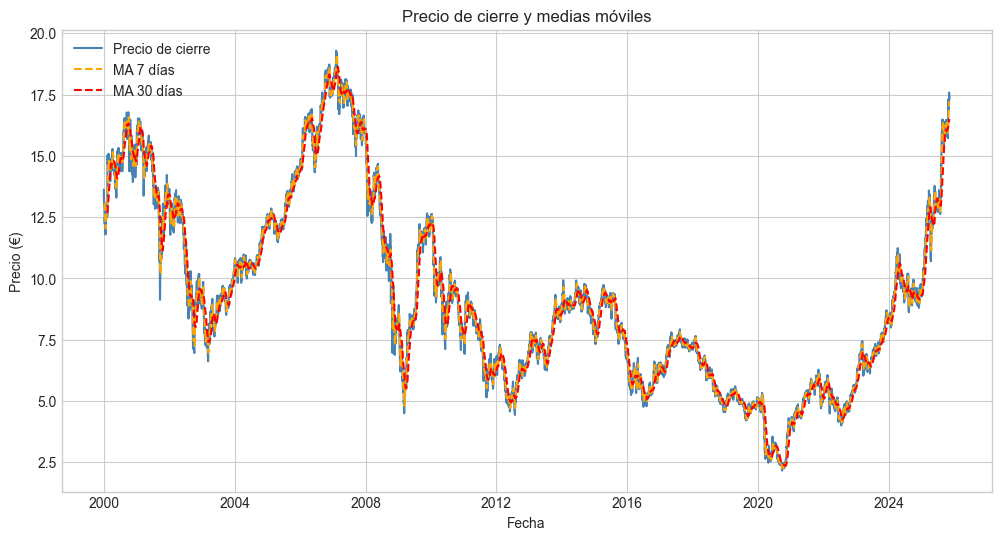

In [205]:
# ==========================================
# 8️⃣ Visualización de medias móviles
# ==========================================
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', color='steelblue')
plt.plot(df['Date'], df['MA_7'], label='MA 7 días', linestyle='--', color='orange')
plt.plot(df['Date'], df['MA_30'], label='MA 30 días', linestyle='--', color='red')
plt.title("Precio de cierre y medias móviles")
plt.xlabel("Fecha")
plt.ylabel("Precio (€)")
plt.legend()
plt.show()

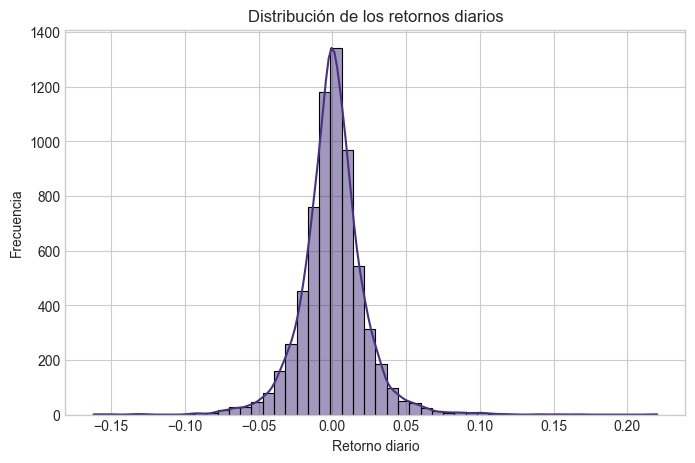

In [206]:
# ==========================================
# 9️⃣ Distribución de retornos
# ==========================================
plt.figure(figsize=(8,5))
sns.histplot(df['Return'].dropna(), bins=50, kde=True)
plt.title("Distribución de los retornos diarios")
plt.xlabel("Retorno diario")
plt.ylabel("Frecuencia")
plt.show()

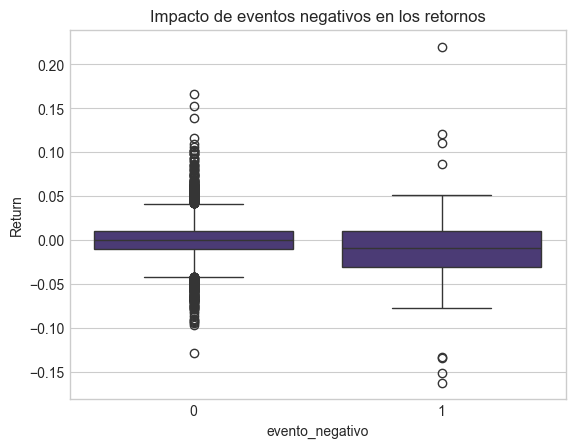

In [207]:
sns.boxplot(x='evento_negativo', y='Return', data=df)
plt.title('Impacto de eventos negativos en los retornos')
plt.show()

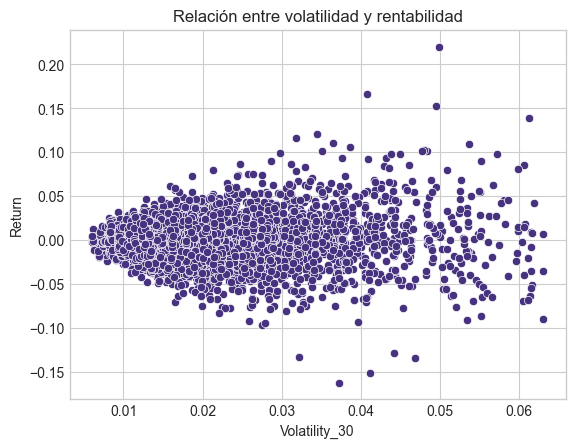

In [208]:
sns.scatterplot(x='Volatility_30', y='Return', data=df)
plt.title('Relación entre volatilidad y rentabilidad')
plt.show()

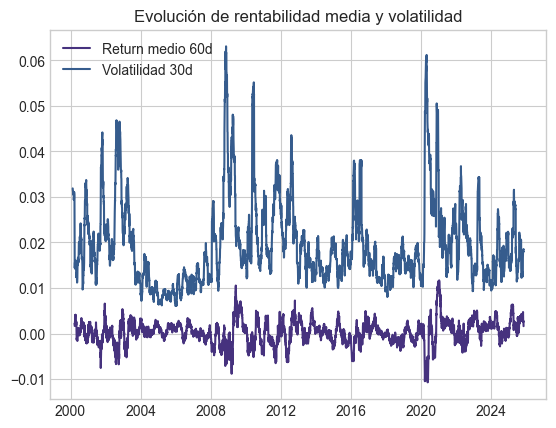

In [209]:
plt.plot(df['Date'], df['Return'].rolling(60).mean(), label='Return medio 60d')
plt.plot(df['Date'], df['Volatility_30'], label='Volatilidad 30d')
plt.legend()
plt.title('Evolución de rentabilidad media y volatilidad')
plt.show()

In [210]:
# Crear columna binaria (1 = hay dividendo, 0 = no hay)
df["Dividens_bin"] = np.where(df["Dividends"] > 0, 1, 0)

# Verificar los primeros valores
print(df[["Date", "Dividens_bin", "Dividends"]].head(40))
#eliminar columna dividends
df = df.drop(columns=["Dividends"])

         Date  Dividens_bin  Dividends
0  2000-01-03             0       0.00
1  2000-01-04             0       0.00
2  2000-01-05             0       0.00
3  2000-01-06             0       0.00
4  2000-01-07             0       0.00
5  2000-01-10             0       0.00
6  2000-01-11             0       0.00
7  2000-01-12             1       0.10
8  2000-01-13             0       0.00
9  2000-01-14             0       0.00
10 2000-01-17             0       0.00
11 2000-01-18             0       0.00
12 2000-01-19             0       0.00
13 2000-01-20             0       0.00
14 2000-01-21             0       0.00
15 2000-01-24             0       0.00
16 2000-01-25             0       0.00
17 2000-01-26             0       0.00
18 2000-01-27             0       0.00
19 2000-01-28             0       0.00
20 2000-01-31             0       0.00
21 2000-02-01             0       0.00
22 2000-02-02             0       0.00
23 2000-02-03             0       0.00
24 2000-02-04            

In [211]:
df = df.drop(columns=["Adj Close"])

In [212]:
df_actualizado = df.copy()

In [213]:
df_actualizado = df_actualizado.dropna().reset_index(drop=True)

print("✅ Nulos eliminados correctamente.")
print(df_actualizado.isna().sum())

✅ Nulos eliminados correctamente.
Date               0
Close              0
High               0
Low                0
Open               0
Volume             0
Return             0
MA_7               0
MA_30              0
Volatility_30      0
Range              0
Body               0
evento_negativo    0
Dividens_bin       0
dtype: int64


In [214]:
df_actualizado.to_csv("../data/bbva_data_actualizado.csv", index=False)

In [215]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

# =========================
# 0) Preparación
# =========================
df_raw = df_actualizado.copy()  # tu DF limpio y sin NaN
df_raw = df_raw.sort_values('Date').reset_index(drop=True)

# Features que tienes (ajusta si falta alguna)
feature_cols = [
    'Open','High','Low','Volume',
    'Range','Return',              # ya las tienes
    'MA_7','MA_30','Volatility_30',# medias/volatilidad
    'Body',                        # cuerpo vela
    'evento_negativo'              # binaria → NO escalar
]

# Target
target_col = 'Close'              # o 'Return' si prefieres predecir dirección
lookback = 60

# =========================
# 1) Split temporal (train/valid)
# =========================
# Ejemplo simple: 80% train, 20% valid manteniendo orden temporal
split_idx = int(len(df_raw)*0.8)
df_train = df_raw.iloc[:split_idx].copy()
df_valid = df_raw.iloc[split_idx:].copy()

# =========================
# 2) Escalado (fit SOLO en train)
# =========================
cont_cols = [c for c in feature_cols if c not in ['evento_negativo', 'Return']]
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()  # para el target si es 'Close'

# Ajustar con train
df_train_scaled = df_train.copy()
df_train_scaled[cont_cols] = scaler_X.fit_transform(df_train[cont_cols])

# Transformar valid
df_valid_scaled = df_valid.copy()
df_valid_scaled[cont_cols] = scaler_X.transform(df_valid[cont_cols])

# Escalar target si predices Close (recomendado para NN)
if target_col == 'Close':
    df_train_scaled[[target_col]] = scaler_y.fit_transform(df_train[[target_col]])
    df_valid_scaled[[target_col]] = scaler_y.transform(df_valid[[target_col]])
else:
    # si target es 'Return', normalmente NO lo escalo
    pass

# =========================
# 3) Crear secuencias
# =========================
def create_sequences(mat_X, vec_y, lb):
    Xs, ys = [], []
    for i in range(len(mat_X)-lb):
        Xs.append(mat_X[i:i+lb])
        ys.append(vec_y[i+lb])
    return np.array(Xs), np.array(ys)

# Matrices de entrada/salida
X_train_all = df_train_scaled[feature_cols].astype(float).values
y_train_all = df_train_scaled[target_col].astype(float).values
X_valid_all = df_valid_scaled[feature_cols].astype(float).values
y_valid_all = df_valid_scaled[target_col].astype(float).values

X_train_seq, y_train_seq = create_sequences(X_train_all, y_train_all, lookback)
X_valid_seq, y_valid_seq = create_sequences(X_valid_all, y_valid_all, lookback)

print("Train seq:", X_train_seq.shape, y_train_seq.shape)
print("Valid seq:", X_valid_seq.shape, y_valid_seq.shape)

# =========================
# 4) DataLoaders
# =========================
batch_size = 64
train_ds = TensorDataset(torch.tensor(X_train_seq, dtype=torch.float32),
                         torch.tensor(y_train_seq, dtype=torch.float32).view(-1,1))
valid_ds = TensorDataset(torch.tensor(X_valid_seq, dtype=torch.float32),
                         torch.tensor(y_valid_seq, dtype=torch.float32).view(-1,1))

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=batch_size, shuffle=False)

print(f"✅ Loaders OK — Train batches: {len(train_loader)}, Valid batches: {len(valid_loader)}")

Train seq: (5224, 60, 11) (5224,)
Valid seq: (1261, 60, 11) (1261,)
✅ Loaders OK — Train batches: 82, Valid batches: 20


In [216]:
df_train_scaled.head()

,Date,Close,High,Low,Open,Volume,Return,MA_7,MA_30,Volatility_30,Range,Body,evento_negativo,Dividens_bin
0,2000-02-14,0.75,0.81,0.69,0.71,0.10,0.12,0.64,0.63,0.45,1.00,0.54,0,0
1,2000-02-15,0.73,0.75,0.73,0.76,0.04,-0.03,0.66,0.63,0.45,0.32,0.54,0,0
2,2000-02-16,0.73,0.73,0.73,0.73,0.03,0.00,0.68,0.64,0.45,0.17,0.01,0,0
3,2000-02-17,0.73,0.73,0.73,0.72,0.02,0.00,0.69,0.64,0.45,0.13,0.12,0,0
4,2000-02-18,0.73,0.72,0.72,0.73,0.02,0.00,0.71,0.64,0.45,0.12,0.06,0,0


### Modelo LSTM

In [217]:
# ==========================================
# Modelo LSTM sencillo para series temporales
# ==========================================
import torch
import torch.nn as nn

class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.head = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        # x: (batch, seq_len, n_features)
        out, _ = self.lstm(x)          # (batch, seq_len, hidden)
        out = out[:, -1, :]            # último paso temporal
        out = self.head(out)           # (batch, 1)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_features = X_train_seq.shape[-1]

model = LSTMRegressor(n_features=n_features, hidden_size=64, num_layers=2, dropout=0.2).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def rmse(y_true, y_pred):
    return torch.sqrt(nn.functional.mse_loss(y_pred, y_true))

In [218]:
def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    total_loss, total_rmse, n = 0.0, 0.0, 0
    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            if train:
                optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            if train:
                loss.backward()
                optimizer.step()
            total_loss += loss.item() * len(xb)
            total_rmse += rmse(yb, pred).item() * len(xb)
            n += len(xb)
    return total_loss / n, total_rmse / n

best_val = float('inf')
patience, patience_left = 100, 100
epochs = 1000
history = []

for epoch in range(1, epochs+1):
    train_loss, train_rmse = run_epoch(train_loader, train=True)
    val_loss, val_rmse = run_epoch(valid_loader, train=False)
    history.append((train_rmse, val_rmse))
    print(f"Epoch {epoch:03d} | RMSE train: {train_rmse:.4f} | RMSE val: {val_rmse:.4f}")

    if val_rmse < best_val - 1e-5:
        best_val = val_rmse
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left == 0:
            print("⏹️ Early stopping")
            break

# Restaurar mejor estado
model.load_state_dict(best_state)
model.to(device)

Epoch 001 | RMSE train: 0.1472 | RMSE val: 0.0335
Epoch 002 | RMSE train: 0.0353 | RMSE val: 0.0219
Epoch 003 | RMSE train: 0.0286 | RMSE val: 0.0160
Epoch 004 | RMSE train: 0.0254 | RMSE val: 0.0166
Epoch 005 | RMSE train: 0.0229 | RMSE val: 0.0141
Epoch 006 | RMSE train: 0.0214 | RMSE val: 0.0149
Epoch 007 | RMSE train: 0.0212 | RMSE val: 0.0149
Epoch 008 | RMSE train: 0.0200 | RMSE val: 0.0116
Epoch 009 | RMSE train: 0.0192 | RMSE val: 0.0115
Epoch 010 | RMSE train: 0.0181 | RMSE val: 0.0112
Epoch 011 | RMSE train: 0.0189 | RMSE val: 0.0106
Epoch 012 | RMSE train: 0.0172 | RMSE val: 0.0112
Epoch 013 | RMSE train: 0.0172 | RMSE val: 0.0111
Epoch 014 | RMSE train: 0.0168 | RMSE val: 0.0109
Epoch 015 | RMSE train: 0.0169 | RMSE val: 0.0103
Epoch 016 | RMSE train: 0.0171 | RMSE val: 0.0102
Epoch 017 | RMSE train: 0.0163 | RMSE val: 0.0102
Epoch 018 | RMSE train: 0.0160 | RMSE val: 0.0138
Epoch 019 | RMSE train: 0.0162 | RMSE val: 0.0101
Epoch 020 | RMSE train: 0.0155 | RMSE val: 0.0107


LSTMRegressor(
  (lstm): LSTM(11, 64, num_layers=2, batch_first=True, dropout=0.2)
  (head): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [219]:
# ==========================================
# Predicciones en valid y desescalado (a euros)
# ==========================================
model.eval()
val_preds_scaled = []
val_true_scaled  = []

with torch.no_grad():
    for xb, yb in valid_loader:
        xb = xb.to(device)
        pred = model(xb).cpu().numpy()
        val_preds_scaled.append(pred)
        val_true_scaled.append(yb.numpy())

val_preds_scaled = np.vstack(val_preds_scaled)   # (N, 1)
val_true_scaled  = np.vstack(val_true_scaled)    # (N, 1)

# Invertir el escalado del target SI target_col == 'Close'
# (usa el scaler_y que ya ajustaste con el train)
from numpy import hstack
val_preds = scaler_y.inverse_transform(val_preds_scaled)
val_true  = scaler_y.inverse_transform(val_true_scaled)

print("RMSE valid (€):", np.sqrt(((val_preds - val_true)**2).mean()))

RMSE valid (€): 0.16239811


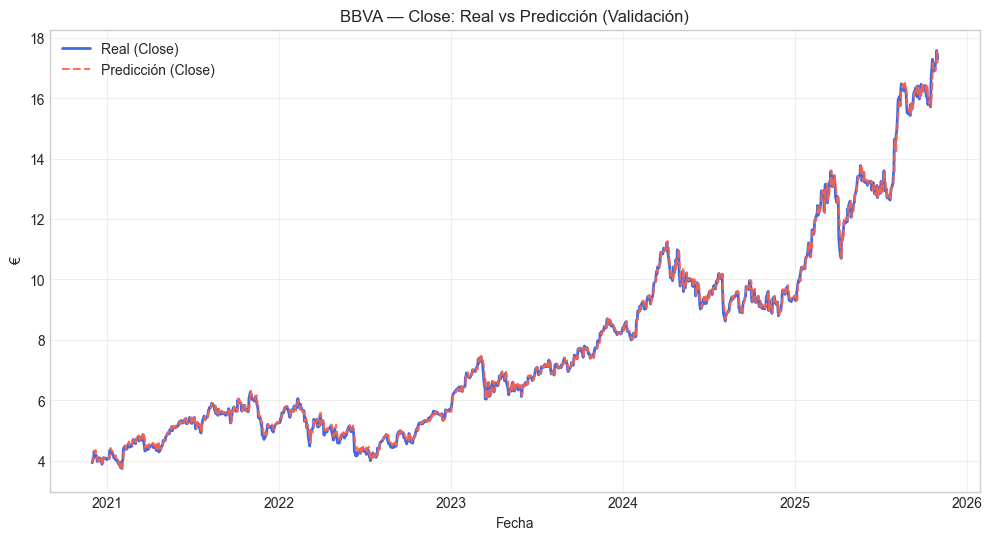

In [220]:
import matplotlib.pyplot as plt

# Alineación temporal: por las ventanas, perdemos 'lookback' pasos al inicio de cada split
valid_dates = df_valid['Date'].iloc[lookback:].reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(valid_dates, val_true.flatten(),
         label='Real (Close)',
         color='royalblue', linewidth=2)

plt.plot(valid_dates, val_preds.flatten(),
         label='Predicción (Close)',
         color='tomato', linestyle='--', alpha=0.9)

plt.title('BBVA — Close: Real vs Predicción (Validación)')
plt.xlabel('Fecha')
plt.ylabel('€')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

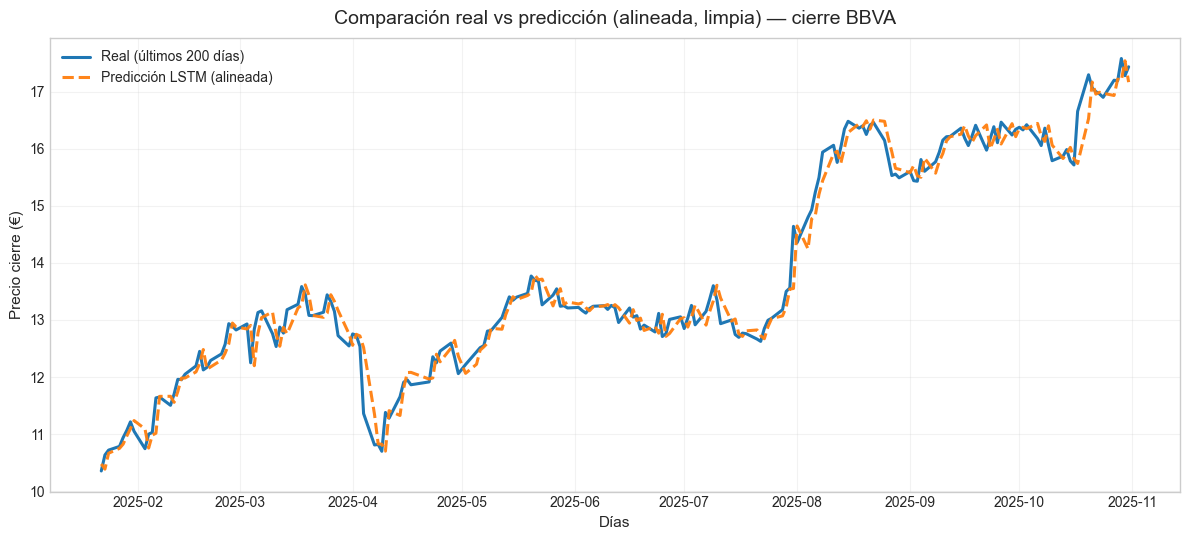

In [221]:
# ==========================================
# 📈 Comparación real vs predicción (LSTM)
# Alineada, limpia y opcionalmente normalizada
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# --- parámetros de visualización ---
last_k = 200          # días finales a mostrar (ej: 100)
smooth_sigma = 0      # 0 = sin suavizado; prueba 2–3 si quieres curvas más suaves
normalize = False     # True = escala ambas series 0–1 en el tramo mostrado

# --- alinear longitudes por seguridad ---
m = min(len(val_true), len(val_preds), len(valid_dates))
y_real_full = val_true.flatten()[:m]
y_pred_full = val_preds.flatten()[:m]
d_full      = np.array(valid_dates)[:m]

# --- seleccionar tramo final ---
y_real_plot = y_real_full[-last_k:]
y_pred_plot = y_pred_full[-last_k:]
d_plot      = d_full[-last_k:]

# --- normalizar (opcional, para que se vean “pegadas”) ---
if normalize:
    ymin = min(y_real_plot.min(), y_pred_plot.min())
    ymax = max(y_real_plot.max(), y_pred_plot.max())
    eps = 1e-9
    y_real_plot = (y_real_plot - ymin) / (ymax - ymin + eps)
    y_pred_plot = (y_pred_plot - ymin) / (ymax - ymin + eps)
    y_label = "Índice normalizado (0–1)"
else:
    y_label = "Precio cierre (€)"


# --- gráfico estilo “presentación” ---
plt.figure(figsize=(12,5.5))
plt.plot(d_plot, y_real_plot, label="Real (últimos {} días)".format(last_k),
         color="#1f77b4", linewidth=2.2)
plt.plot(d_plot, y_pred_plot, label="Predicción LSTM (alineada)",
         color="#ff7f0e", linestyle="--", linewidth=2.2, alpha=0.95)

plt.title("Comparación real vs predicción (alineada, limpia) — cierre BBVA", fontsize=14, pad=10)
plt.xlabel("Días", fontsize=11); plt.ylabel(y_label, fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

In [222]:
import joblib
torch.save(model.state_dict(), "../models/lstm_bbva.pt")
joblib.dump(scaler_X, "../models/scaler_X_bbva.pkl")
joblib.dump(scaler_y, "../models/scaler_y_bbva.pkl")
print("✅ Modelo y scalers guardados")

✅ Modelo y scalers guardados


In [223]:
# y_true y y_pred del VALID ya desescalados en € (los que has graficado)
y_true = val_true.flatten()
y_pred = val_preds.flatten()

# Baseline 1: Naive (mañana = hoy) usando la propia serie real del valid
# Ojo: por alineación, comparamos desde el segundo valor
y_naive = y_true[:-1]
y_true_naive_cmp = y_true[1:]

def rmse(a,b): return np.sqrt(((a-b)**2).mean())
def mae(a,b):  return np.abs(a-b).mean()
def mape(a,b): return (np.abs((a-b)/a).mean()*100)

print("LSTM  - RMSE/MAE/MAPE:",
      rmse(y_true, y_pred), mae(y_true, y_pred), mape(y_true, y_pred))

print("Naive - RMSE/MAE/MAPE:",
      rmse(y_true_naive_cmp, y_naive),
      mae(y_true_naive_cmp, y_naive),
      mape(y_true_naive_cmp, y_naive))

LSTM  - RMSE/MAE/MAPE: 0.16239811 0.11122417 1.4887829
Naive - RMSE/MAE/MAPE: 0.15847273 0.108235724 1.4248236


### RNN Simple

In [224]:
class SimpleRNNRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.rnn = nn.RNN(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]   # último paso temporal
        return self.fc(out)

In [225]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = X_train_seq.shape[2]
hidden_size = 64
num_layers = 2
dropout = 0.2
lr = 0.001
epochs = 1000

# Crear modelo
model_rnn = SimpleRNNRegressor(n_features, hidden_size, num_layers, dropout).to(device)

# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=lr)

In [226]:
# ============================================================
# 🔁 ENTRENAMIENTO RNN con Early Stopping + ReduceLROnPlateau
# ============================================================
import torch.nn as nn

train_losses, valid_losses = [], []



best_val = float('inf')
best_state = None
patience = 12          # nº de épocas sin mejora antes de parar
patience_left = patience
tol = 1e-6             # umbral mínimo de mejora
max_epochs = epochs    # puedes dejar 1000; parará antes

for epoch in range(1, max_epochs+1):
    # --------- TRAIN ---------
    model_rnn.train()
    batch_losses = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model_rnn(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_loss = float(np.mean(batch_losses))
    train_losses.append(train_loss)

    # --------- VALID ---------
    model_rnn.eval()
    val_batch_losses = []
    with torch.no_grad():
        for xb, yb in valid_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model_rnn(xb)
            val_loss = criterion(preds, yb).item()
            val_batch_losses.append(val_loss)
    valid_loss = float(np.mean(val_batch_losses))
    valid_losses.append(valid_loss)

    # Log
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch:04d}/{max_epochs} | "
          f"Train: {train_loss:.6f} | Valid: {valid_loss:.6f} | lr: {current_lr:.2e}")

    # --------- EARLY STOPPING ---------
    if valid_loss < best_val - tol:
        best_val = valid_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model_rnn.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left == 0:
            print("⏹️ Early stopping (sin mejora en validación)")
            break

# Restaurar el mejor estado y dejar en eval
if best_state is not None:
    model_rnn.load_state_dict(best_state)
model_rnn.eval()

Epoch 0001/1000 | Train: 0.016486 | Valid: 0.000579 | lr: 1.00e-03
Epoch 0002/1000 | Train: 0.001095 | Valid: 0.000241 | lr: 1.00e-03
Epoch 0003/1000 | Train: 0.000747 | Valid: 0.000375 | lr: 1.00e-03
Epoch 0004/1000 | Train: 0.000644 | Valid: 0.000268 | lr: 1.00e-03
Epoch 0005/1000 | Train: 0.000560 | Valid: 0.000224 | lr: 1.00e-03
Epoch 0006/1000 | Train: 0.000481 | Valid: 0.000158 | lr: 1.00e-03
Epoch 0007/1000 | Train: 0.000484 | Valid: 0.000152 | lr: 1.00e-03
Epoch 0008/1000 | Train: 0.000418 | Valid: 0.000361 | lr: 1.00e-03
Epoch 0009/1000 | Train: 0.000369 | Valid: 0.000159 | lr: 1.00e-03
Epoch 0010/1000 | Train: 0.000354 | Valid: 0.000137 | lr: 1.00e-03
Epoch 0011/1000 | Train: 0.000354 | Valid: 0.000155 | lr: 1.00e-03
Epoch 0012/1000 | Train: 0.000333 | Valid: 0.000176 | lr: 1.00e-03
Epoch 0013/1000 | Train: 0.000378 | Valid: 0.000126 | lr: 1.00e-03
Epoch 0014/1000 | Train: 0.000333 | Valid: 0.000147 | lr: 1.00e-03
Epoch 0015/1000 | Train: 0.000340 | Valid: 0.000169 | lr: 1.00

SimpleRNNRegressor(
  (rnn): RNN(11, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [227]:
model_rnn.eval()

# Obtener predicciones finales en validación
val_preds_list, val_true_list = [], []
with torch.no_grad():
    for xb, yb in valid_loader:
        xb = xb.to(device)
        preds = model_rnn(xb).cpu().numpy()
        val_preds_list.append(preds)
        val_true_list.append(yb.numpy())

val_preds = np.vstack(val_preds_list)
val_true = np.vstack(val_true_list)

# Desescalar a euros si el target era 'Close'
val_preds_inv = scaler_y.inverse_transform(val_preds)
val_true_inv = scaler_y.inverse_transform(val_true)

# Calcular RMSE valid
rmse_valid = np.sqrt(((val_preds_inv - val_true_inv)**2).mean())
print(f"\n✅ RMSE valid (€): {rmse_valid:.6f}")


✅ RMSE valid (€): 0.187971


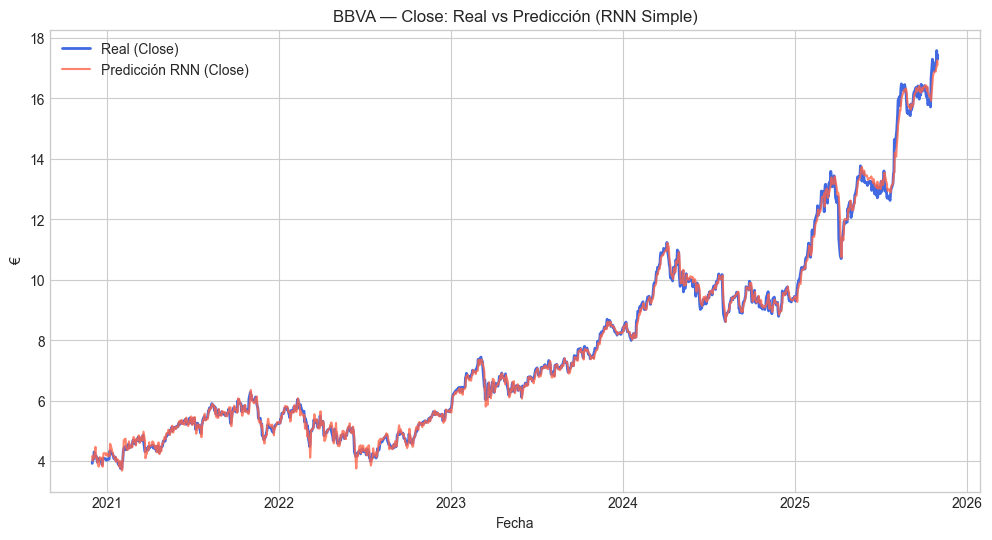

In [228]:
valid_dates = df_valid_scaled['Date'].iloc[lookback:].values

plt.figure(figsize=(12,6))
plt.plot(valid_dates, val_true_inv.flatten(), label='Real (Close)', color='royalblue', linewidth=2)
plt.plot(valid_dates, val_preds_inv.flatten(), label='Predicción RNN (Close)', color='tomato', alpha=0.8)
plt.title('BBVA — Close: Real vs Predicción (RNN Simple)')
plt.xlabel('Fecha')
plt.ylabel('€')
plt.legend()
plt.show()

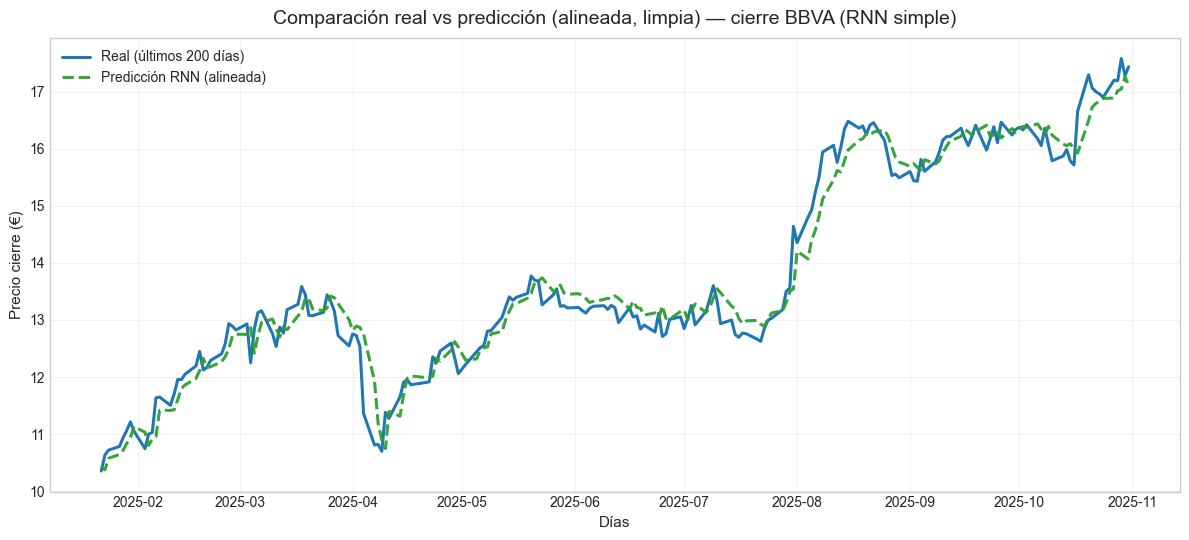

In [229]:
# ==========================================
# 📊 Comparación real vs predicción — RNN simple (en €)
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# --- parámetros de visualización ---
last_k = 200          # nº de días finales a mostrar (cámbialo si quieres)
normalize = False     # True para 0–1 en el tramo mostrado
smooth_sigma = 0      # 0 = sin suavizado | 2–3 = suavizado leve

# --- construir las fechas alineadas con las secuencias de validación ---
valid_dates_rnn = df_valid['Date'].iloc[lookback:lookback+len(val_true_inv)].reset_index(drop=True)

# --- asegurar longitudes coherentes ---
m = min(len(val_true_inv), len(val_preds_inv), len(valid_dates_rnn))
y_real_full = val_true_inv.flatten()[:m]
y_pred_full = val_preds_inv.flatten()[:m]
d_full      = np.array(valid_dates_rnn)[:m]

# --- seleccionar tramo final ---
y_real_plot = y_real_full[-last_k:]
y_pred_plot = y_pred_full[-last_k:]
d_plot      = d_full[-last_k:]

# --- normalización opcional (para comparar forma) ---
if normalize:
    ymin = min(y_real_plot.min(), y_pred_plot.min())
    ymax = max(y_real_plot.max(), y_pred_plot.max())
    eps = 1e-9
    y_real_plot = (y_real_plot - ymin) / (ymax - ymin + eps)
    y_pred_plot = (y_pred_plot - ymin) / (ymax - ymin + eps)
    y_label = "Índice normalizado (0–1)"
else:
    y_label = "Precio cierre (€)"

# --- suavizado visual opcional ---
if smooth_sigma and smooth_sigma > 0:
    y_real_plot = gaussian_filter1d(y_real_plot, sigma=smooth_sigma)
    y_pred_plot = gaussian_filter1d(y_pred_plot, sigma=smooth_sigma)

# --- gráfico final (estilo limpio) ---
plt.figure(figsize=(12,5.5))
plt.plot(d_plot, y_real_plot, label=f"Real (últimos {last_k} días)",
         color="#1f77b4", linewidth=2.2)
plt.plot(d_plot, y_pred_plot, label="Predicción RNN (alineada)",
         color="#2ca02c", linestyle="--", linewidth=2.2, alpha=0.95)

plt.title("Comparación real vs predicción (alineada, limpia) — cierre BBVA (RNN simple)",
          fontsize=14, pad=10)
plt.xlabel("Días", fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

In [230]:
torch.save(model.state_dict(), "../models/RNN_bbva.pt")
joblib.dump(scaler_X, "../models/scaler_X_bbvaRNN.pkl")
joblib.dump(scaler_y, "../models/scaler_y_bbvaRNN.pkl")
print("✅ Modelo y scalers guardados")

✅ Modelo y scalers guardados


### GRU

In [231]:
import torch
import torch.nn as nn

class GRURegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.gru = nn.GRU(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        out, _ = self.gru(x)      # (batch, seq, hidden)
        out = out[:, -1, :]       # último paso temporal
        return self.fc(out)

In [232]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = X_train_seq.shape[2]
hidden_size = 64
num_layers = 2
dropout = 0.2
lr = 1e-3
max_epochs = 400  # tope; parará antes por early stopping

model_gru = GRURegressor(n_features, hidden_size, num_layers, dropout).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_gru.parameters(), lr=lr)


best_val = float('inf')
best_state = None
patience = 12
patience_left = patience
tol = 1e-6

In [233]:
train_losses_gru, valid_losses_gru = [], []

for epoch in range(1, max_epochs+1):
    # ------- TRAIN -------
    model_gru.train()
    batch_losses = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model_gru(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_loss = float(np.mean(batch_losses))
    train_losses_gru.append(train_loss)

    # ------- VALID -------
    model_gru.eval()
    val_batch_losses = []
    with torch.no_grad():
        for xb, yb in valid_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model_gru(xb)
            val_loss = criterion(preds, yb).item()
            val_batch_losses.append(val_loss)
    valid_loss = float(np.mean(val_batch_losses))
    valid_losses_gru.append(valid_loss)

    print(f"Epoch {epoch:04d}/{max_epochs} | Train: {train_loss:.6f} | Valid: {valid_loss:.6f} | lr: {optimizer.param_groups[0]['lr']:.2e}")

    # Early stopping
    if valid_loss < best_val - tol:
        best_val = valid_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model_gru.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left == 0:
            print("⏹️ Early stopping (sin mejora)")
            break

# Restaurar mejor estado
if best_state is not None:
    model_gru.load_state_dict(best_state)
model_gru.eval()

Epoch 0001/400 | Train: 0.024079 | Valid: 0.000513 | lr: 1.00e-03
Epoch 0002/400 | Train: 0.000792 | Valid: 0.000335 | lr: 1.00e-03
Epoch 0003/400 | Train: 0.000633 | Valid: 0.000244 | lr: 1.00e-03
Epoch 0004/400 | Train: 0.000487 | Valid: 0.000230 | lr: 1.00e-03
Epoch 0005/400 | Train: 0.000451 | Valid: 0.000238 | lr: 1.00e-03
Epoch 0006/400 | Train: 0.000381 | Valid: 0.000185 | lr: 1.00e-03
Epoch 0007/400 | Train: 0.000342 | Valid: 0.000171 | lr: 1.00e-03
Epoch 0008/400 | Train: 0.000330 | Valid: 0.000155 | lr: 1.00e-03
Epoch 0009/400 | Train: 0.000316 | Valid: 0.000168 | lr: 1.00e-03
Epoch 0010/400 | Train: 0.000317 | Valid: 0.000154 | lr: 1.00e-03
Epoch 0011/400 | Train: 0.000289 | Valid: 0.000139 | lr: 1.00e-03
Epoch 0012/400 | Train: 0.000292 | Valid: 0.000179 | lr: 1.00e-03
Epoch 0013/400 | Train: 0.000260 | Valid: 0.000188 | lr: 1.00e-03
Epoch 0014/400 | Train: 0.000253 | Valid: 0.000137 | lr: 1.00e-03
Epoch 0015/400 | Train: 0.000301 | Valid: 0.000157 | lr: 1.00e-03
Epoch 0016

GRURegressor(
  (gru): GRU(11, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [234]:
# Predicciones en valid
val_preds_list, val_true_list = [], []
with torch.no_grad():
    for xb, yb in valid_loader:
        xb = xb.to(device)
        pred = model_gru(xb).cpu().numpy()
        val_preds_list.append(pred)
        val_true_list.append(yb.numpy())

val_preds_scaled = np.vstack(val_preds_list)
val_true_scaled  = np.vstack(val_true_list)

# Desescalar (target Close)
val_preds = scaler_y.inverse_transform(val_preds_scaled)
val_true  = scaler_y.inverse_transform(val_true_scaled)

# Métricas
rmse_valid = np.sqrt(((val_preds - val_true)**2).mean())
mae_valid  = np.abs(val_preds - val_true).mean()
mape_valid = (np.abs((val_preds - val_true)/val_true).mean() * 100)

print(f"✅ GRU — RMSE valid (€): {rmse_valid:.6f} | MAE: {mae_valid:.6f} | MAPE: {mape_valid:.3f}%")

✅ GRU — RMSE valid (€): 0.165652 | MAE: 0.116026 | MAPE: 1.561%


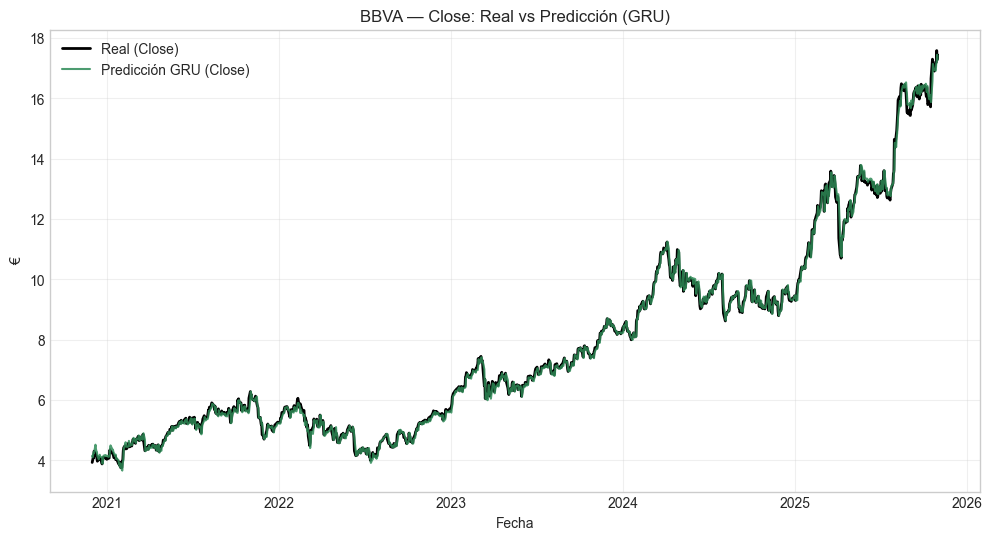

In [235]:
valid_dates = df_valid_scaled['Date'].iloc[lookback:].values

plt.figure(figsize=(12,6))
plt.plot(valid_dates, val_true.flatten(), label='Real (Close)', color='black', linewidth=2)
plt.plot(valid_dates, val_preds.flatten(), label='Predicción GRU (Close)', color='seagreen', alpha=0.85)
plt.title('BBVA — Close: Real vs Predicción (GRU)')
plt.xlabel('Fecha'); plt.ylabel('€'); plt.legend()
plt.grid(alpha=0.3)
plt.show()

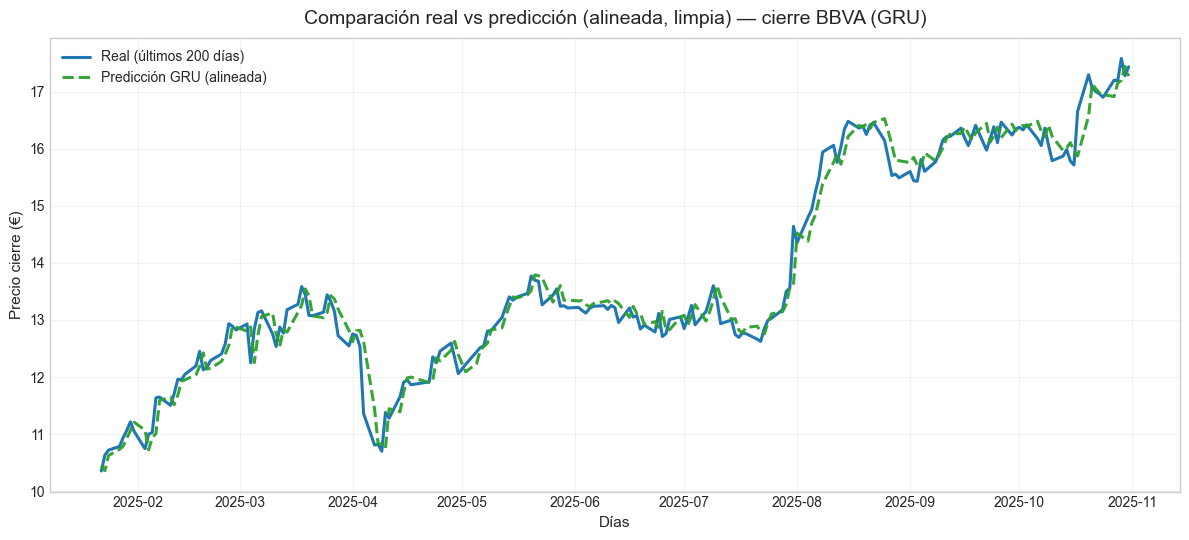

In [236]:
# ==========================================
# 📊 Comparación real vs predicción — GRU (en €)
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# --- parámetros de visualización ---
last_k = 200          # nº de días finales a mostrar
normalize = False     # True → normaliza 0–1 en el tramo mostrado
smooth_sigma = 0      # 0 = sin suavizado | 2–3 = suavizado leve

# --- construir fechas alineadas con las secuencias de validación ---
valid_dates_gru = df_valid['Date'].iloc[lookback:lookback+len(val_true)].reset_index(drop=True)

# --- asegurar longitudes coherentes ---
m = min(len(val_true), len(val_preds), len(valid_dates_gru))
y_real_full = val_true.flatten()[:m]
y_pred_full = val_preds.flatten()[:m]
d_full      = np.array(valid_dates_gru)[:m]

# --- seleccionar tramo final ---
y_real_plot = y_real_full[-last_k:]
y_pred_plot = y_pred_full[-last_k:]
d_plot      = d_full[-last_k:]

# --- normalización opcional ---
if normalize:
    ymin = min(y_real_plot.min(), y_pred_plot.min())
    ymax = max(y_real_plot.max(), y_pred_plot.max())
    eps = 1e-9
    y_real_plot = (y_real_plot - ymin) / (ymax - ymin + eps)
    y_pred_plot = (y_pred_plot - ymin) / (ymax - ymin + eps)
    y_label = "Índice normalizado (0–1)"
else:
    y_label = "Precio cierre (€)"

# --- suavizado visual opcional ---
if smooth_sigma and smooth_sigma > 0:
    y_real_plot = gaussian_filter1d(y_real_plot, sigma=smooth_sigma)
    y_pred_plot = gaussian_filter1d(y_pred_plot, sigma=smooth_sigma)

# --- gráfico final ---
plt.figure(figsize=(12,5.5))
plt.plot(d_plot, y_real_plot, label=f"Real (últimos {last_k} días)",
         color="#1f77b4", linewidth=2.2)
plt.plot(d_plot, y_pred_plot, label="Predicción GRU (alineada)",
         color="#2ca02c", linestyle="--", linewidth=2.2, alpha=0.95)

plt.title("Comparación real vs predicción (alineada, limpia) — cierre BBVA (GRU)",
          fontsize=14, pad=10)
plt.xlabel("Días", fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


In [237]:
torch.save(model.state_dict(), "../models/GRU_bbva.pt")
joblib.dump(scaler_X, "../models/scaler_X_bbvaGRU.pkl")
joblib.dump(scaler_y, "../models/scaler_y_bbvaGRU.pkl")
print("✅ Modelo y scalers guardados")

✅ Modelo y scalers guardados
